# Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_pos = X_train[Y_train==1]
    X_neg  = X_train[Y_train==-1]

    mu_pos = np.mean(X_pos,axis=0)
    mu_neg = np.mean(X_neg,axis=0)

    y_pos = Y_train[Y_train==1]

    P_Y_pos = len(y_pos)/len(Y_train)

    w = mu_neg- mu_pos
    b = (np.linalg.norm(mu_pos)**2-np.linalg.norm(mu_neg)**2)/2 + np.log((1-P_Y_pos)/P_Y_pos)
    eta = 1/(1 + np.exp(X_test@w.T+b))

    Y_pred = np.sign(2*eta-1)

    return Y_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_pos = X_train[Y_train==1]
    X_neg  = X_train[Y_train==-1]

    mu_pos = np.mean(X_pos,axis=0)
    mu_neg = np.mean(X_neg,axis=0)

    y_pos = Y_train[Y_train==1]

    P_Y_pos = len(y_pos)/len(Y_train)
 
    cov_tot = np.cov(X_train.T,bias=True)
    cov_tot_inv = np.linalg.inv(cov_tot)

    var_pos1 = (X_test-mu_pos)
    var_pos2 = ((var_pos1@cov_tot_inv)*var_pos1).sum(axis=1)
    var_neg1 = (X_test-mu_neg)
    var_neg2 = ((var_neg1@cov_tot_inv)*var_neg1).sum(axis=1)

    b = np.log((1-P_Y_pos)/P_Y_pos)

    eta = 1/(1+ np.exp(b+0.5*var_pos2-0.5*var_neg2))
    Y_test_pred = np.sign(2*eta-1)

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    y_pos = Y_train[Y_train==1]
    P_Y_pos = len(y_pos)/len(Y_train)
    X_pos = X_train[Y_train==1,:]
    X_neg  = X_train[Y_train==-1,:]
    mu_pos = np.mean(X_pos,axis=0)
    mu_neg = np.mean(X_neg,axis=0)

    cov_pos = np.cov(X_pos.T,bias=True)
    cov_neg = np.cov(X_neg.T,bias=True)
    cov_pos_inv = np.linalg.inv(cov_pos)
    cov_neg_inv = np.linalg.inv(cov_neg)
    var_pos1 = (X_test-mu_pos)
    var_pos2 = ((var_pos1@cov_pos_inv)*var_pos1).sum(axis=1)
    var_neg1 = (X_test-mu_neg)
    var_neg2 = ((var_neg1@cov_neg_inv)*var_neg1).sum(axis=1)
    det_pos = np.linalg.det(cov_pos)
    det_neg = np.linalg.det(cov_neg)
    b = np.log((1-P_Y_pos)/P_Y_pos)

    eta = 1/(1+ ((det_pos/det_neg)**0.5)*np.exp(b+0.5*var_pos2-0.5*var_neg2))
    Y_test_pred = np.sign(2*eta-1)

    return Y_test_pred

def calculate_error(y_true, y_pred):

  # Get the number of samples
  num_samples = y_true.shape[0]

  # Count the number of misclassified samples
  misclassified = np.sum(y_true != y_pred)

  # Calculate error rate (as a percentage)
  error = (misclassified / num_samples) * 100

  return error

In [3]:
X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

Running the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

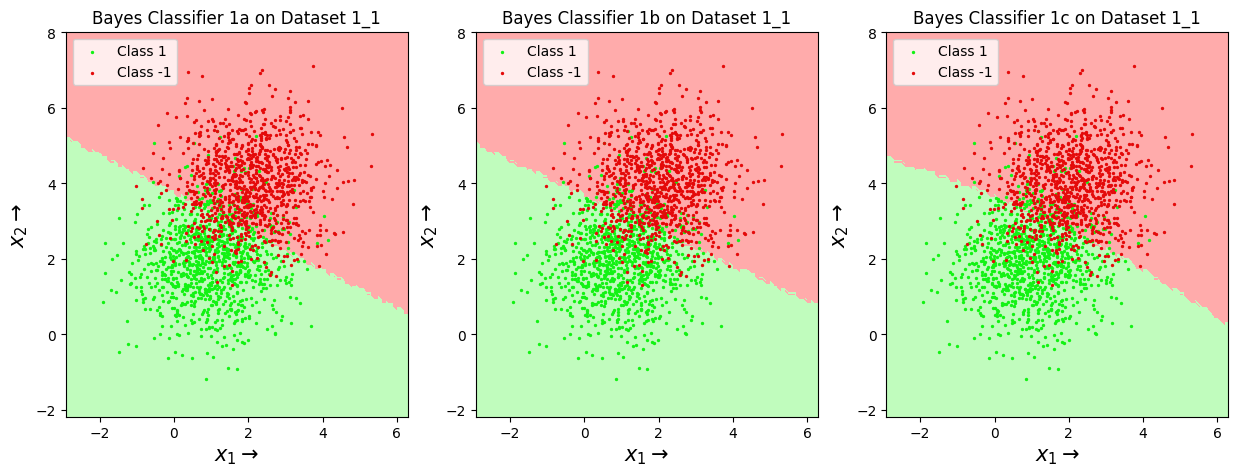

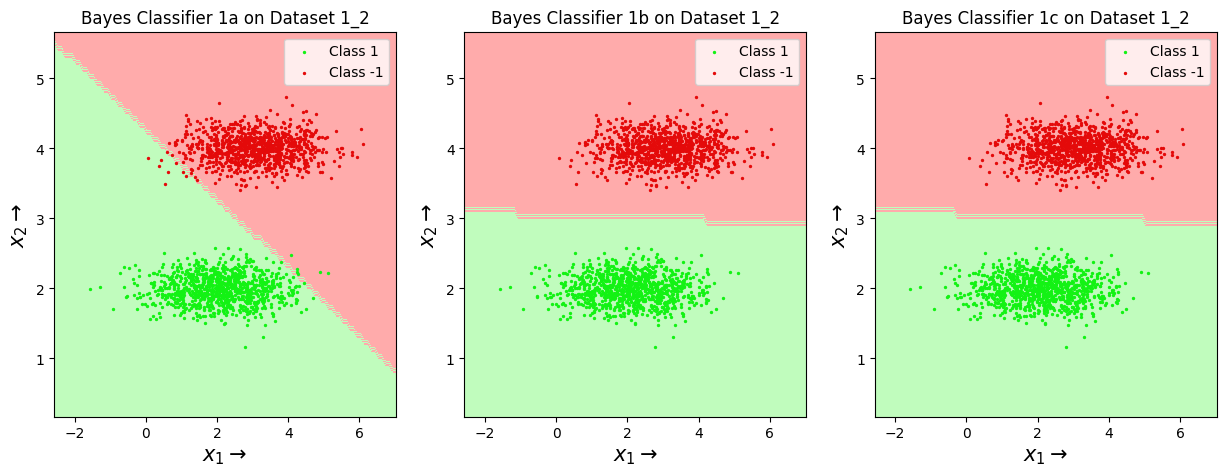

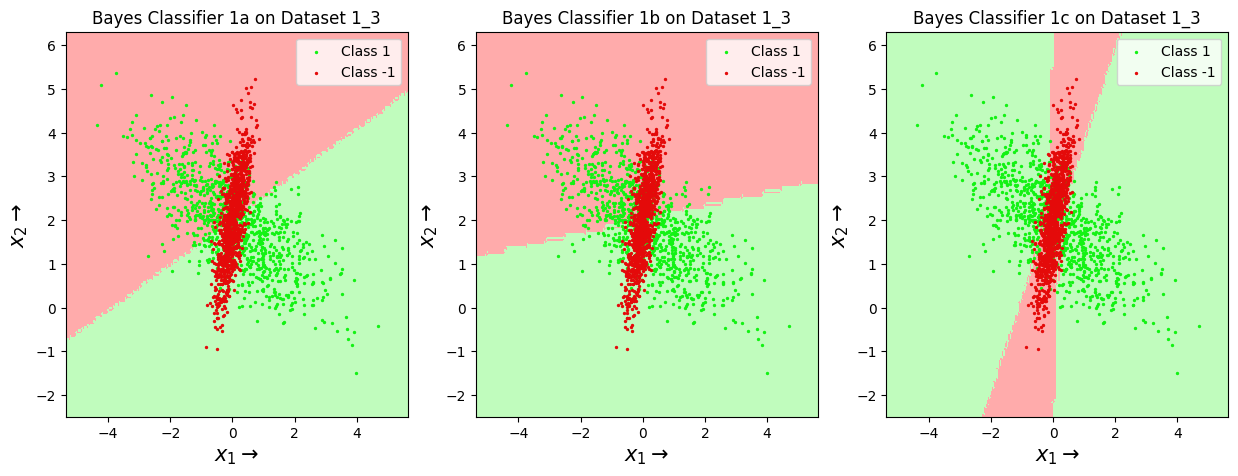

In [4]:
data1_1 = np.load('Data/dataset1_1.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_pred_11a = Bayes1a(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_11a)
Y_pred_11b = Bayes1b(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_11b)
Y_pred_11c = Bayes1c(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_11c)

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
test_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
Z11a = Bayes1a(X_train,Y_train,test_data)
Z11b = Bayes1b(X_train,Y_train,test_data)
Z11c = Bayes1c(X_train,Y_train,test_data)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.set_title('Bayes Classifier 1a on Dataset 1_1')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.contourf(xx,yy,Z11a.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a',label='Class -1')
ax1.legend()

ax2.set_title('Bayes Classifier 1b on Dataset 1_1')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.contourf(xx,yy,Z11b.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label="Class -1")
ax2.legend()

ax3.set_title('Bayes Classifier 1c on Dataset 1_1')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(xx,yy,Z11c.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label='Class -1')
ax3.legend()

data1_2 = np.load('Data/dataset1_2.npz')
X_train, Y_train, X_test, Y_test = data1_2['arr_0'],data1_2['arr_1'],data1_2['arr_2'],data1_2['arr_3']
Y_pred_21a = Bayes1a(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_21a)
Y_pred_21b = Bayes1b(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_21b)
Y_pred_21c = Bayes1c(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_21c)

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
test_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
Z12a = Bayes1a(X_train,Y_train,test_data)
Z12b = Bayes1b(X_train,Y_train,test_data)
Z12c = Bayes1c(X_train,Y_train,test_data)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
                                              
ax1.set_title('Bayes Classifier 1a on Dataset 1_2')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.contourf(xx,yy,Z12a.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a',label='Class -1')
ax1.legend()

ax2.set_title('Bayes Classifier 1b on Dataset 1_2')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.contourf(xx,yy,Z12b.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label="Class -1")
ax2.legend()

ax3.set_title('Bayes Classifier 1c on Dataset 1_2')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(xx,yy,Z12c.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label='Class -1')
ax3.legend()

data1_3 = np.load('Data/dataset1_3.npz')
X_train, Y_train, X_test, Y_test = data1_3['arr_0'],data1_3['arr_1'],data1_3['arr_2'],data1_3['arr_3']
Y_pred_31a = Bayes1a(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_31a)
Y_pred_31b = Bayes1b(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_31b)
Y_pred_31c = Bayes1c(X_train,Y_train,X_test)
error = calculate_error(Y_test, Y_pred_31c)

X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
test_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
Z13a = Bayes1a(X_train,Y_train,test_data)
Z13b = Bayes1b(X_train,Y_train,test_data)
Z13c = Bayes1c(X_train,Y_train,test_data)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.set_title('Bayes Classifier 1a on Dataset 1_3')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.contourf(xx,yy,Z13a.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a',label='Class -1')
ax1.legend()

ax2.set_title('Bayes Classifier 1b on Dataset 1_3')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.contourf(xx,yy,Z13b.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label="Class -1")
ax2.legend()

ax3.set_title('Bayes Classifier 1c on Dataset 1_3')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(xx,yy,Z13c.reshape(xx.shape),colors=['#ffabab','#c0fcbd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='#13f214', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#e40a0a', label='Class -1')
ax3.legend()

**Observations:**


**Error Rate:**
Classifier | Bayes 1a | Bayes 1b | Bayes 1c  
--- | --- | --- | ---
Dataset1_1 | 12.60% |  12.45% | 12.45% 
Dataset1_2 |  0.85% |   0.00% |  0.00%
Dataset1_3 | 49.70% |  49.50% | 13.50%

**1.Bayes Classifier 1a:**

The classifier 1a assumes that the features are independent and have same variance. 

This is a strong assumption and may not hold true for real data. 

This classifier performs poorly if features are correlated or have different variances. 

**2.Bayes Classifier 1b:**

This classifier captures the overall covariance structure of the data, potentially leading to better performance than the identity matrix case.

Assumes a single underlying covariance matrix for all classes, which might not be ideal if the class distributions differ significantly.

Expected to perform better than the identity case if features are correlated or have varying variances.

Might underperform if class distributions have distinct covariance structures.

**3.Bayes Classifier 1c:**

This classifier offers the most flexibility by allowing different covariance structures for positive and negative classes.

Likely to achieve the best performance among the three if the class distributions have distinct covariance structures.

Might be more susceptible to overfitting due to the increased number of parameters to learn (separate covariances for each class).

The observations are hold with the error rate obtained below:

**Dataset 1_1:**

The datapoints appear to be uncorrelated and hence we observe almost same performance from each classifier.

**Dataset 1_2:**

The features are correlated and the data points are separated. The classifier 1a always separated the datapoints by the line perpendicular to the line joining the mean vector of the class conditional distributions. The classifier 1b and 1c which takes into account the covariances performs better than 1a.

**Dataset 1_3:**

There is no possible linear boundary to seperate this data. The classifiers 1a and 1b  perform poorly compared to 1c. This is because classifier 1c can produce non linear decision boundaries and other classifiers cannot. 